In [5]:
import cv2
import os


images_dir = "media"
base_img_name = "FirstFrame.png"

base_img = cv2.imread(os.path.join(images_dir, base_img_name))

img_grey = cv2.cvtColor(base_img, cv2.COLOR_RGB2GRAY)
thresh, img_binary = cv2.threshold(img_grey, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [3]:
cv2.imshow("test",img_binary)

In [5]:
cv2.destroyAllWindows()

In [1]:
%matplotlib inline

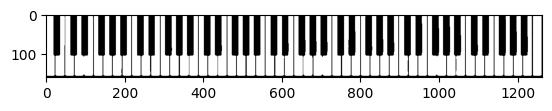

In [6]:
from matplotlib import pyplot as plt
plt.imshow(img_binary,cmap='gray')
plt.show()

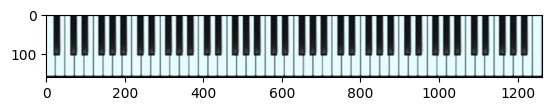

In [7]:
plt.imshow(base_img)
plt.show()

56


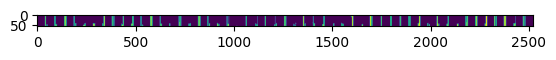

In [9]:
import cv2
import os
import numpy as np
from utils import preprocessing, key_detection



images_dir = "media"
base_img_name = "FirstFrame.png"

base_img = cv2.imread(os.path.join(images_dir, "cropped.png"))
binary_rectified_sobel, binary_rectified = preprocessing.getBinaryImages(base_img)
canny = cv2.Canny(base_img, 120,200)
thresh, eroded = cv2.threshold(canny, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#eroded = cv2.dilate(canny, cv2.getStructuringElement(cv2.MORPH_ERODE, (5,5)))

cv2.imshow("sobel", binary_rectified_sobel)
imheight = base_img.shape[0]
im_bottom = binary_rectified_sobel[int(imheight - (imheight / 5)):imheight, :]
im_botton_canny = canny[int(imheight - (imheight / 5)):imheight, :]

lines = cv2.HoughLinesP(im_botton_canny, rho=0.2, theta=np.pi/2, threshold=5, minLineLength=40)
cv2.imshow("bottom", im_botton_canny)
print(im_bottom.shape[0])

new_lines = [l[0] for l in lines]
line_img = im_bottom.copy()
for line in new_lines:
    leftx, boty, rightx, topy = line
    line_img = cv2.line(line_img, (leftx, boty), (rightx,topy), (0,0,255), 6)

plt.imshow(line_img)
plt.show()


In [2]:
import music21 as music

music.environment.set("lilypondPath", "C:\\Program Files (x86)\\lilypond\\bin\\lilypond.exe")

In [5]:


# Define your list of music notes (pitch, start time, duration)
music_notes = [
    ("C4", 0.0, 4.1),  # Example note 1: C4 starting at 0.0 seconds, lasts 2.0 seconds
    ("E4", 1, 3.02),  # Example note 2: E4 starting at 1.0 second, lasts 1.5 seconds (overlapping)
    ("G4", 2.01, 2.2)   # Example note 3: G4 starting at 2.0 seconds, lasts 2.0 seconds


]

# Create a Stream object
stream = music.stream.Stream()

# Iterate through the list of music notes
for pitch, start, duration in music_notes:
    # Create a Note object
    note = music.note.Note(pitch)
    
    # Set the start time of the note
    
    
    # Set the duration of the note
    note.duration = music.duration.Duration(duration)
    
    # Add the Note object to the Stream
    stream.insert(start, note)
    #stream[-1].offset = start

# Show the Stream
stream.show('midi')
fp = stream.write('midi', fp='./test.mid')

In [12]:
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.DEBUG)
logging.getLogger('foo').debug('bah')
logging.getLogger().setLevel(logging.INFO)
test = logging.getLogger('foo')
record = test.makeRecord("self.name", logging.INFO, "", 0, "title", (), None)
formatted_title = test.parent.handlers[0].format(record)
test.makeR
formatted_title


DEBUG:foo:bah


'INFO:self.name:title'

In [2]:
import music21
music21.environment.set("lilypondPath", "C:\\Program Files (x86)\\lilypond\\bin\\lilypond.exe")
t = music21.converter.parse("./output_files/go.xml")


music21.stream.base.Score

In [3]:
music21.stream.Stream(t)
type(t)

music21.stream.base.Score

In [2]:
import subprocess

subprocess.run(["C:\\Users\\simon\\Downloads\\MidiSheetMusic-2.6.2.exe", "./test.mid"])

KeyboardInterrupt: 

In [2]:
from music21 import *

# Define your list of music notes (pitch, start time, duration)
music_notes = [
    ("C4", 0.0, 4.0),  # Example note 1: C4 starting at 0.0 seconds, lasts 2.0 seconds
    ("E4", 1.0, 3.0),  # Example note 2: E4 starting at 1.0 second, lasts 1.5 seconds (overlapping)
    ("G4", 2.0, 2.0)   # Example note 3: G4 starting at 2.0 seconds, lasts 2.0 seconds


]

# Create a list to hold streams
streams = []

# Iterate through the list of music notes
for pitch, start, d in music_notes:
    n = note.Note(pitch)
    n.duration = duration.Duration(d)
    
    # Create a new stream if there's an overlap
    if len(streams) == 0 or start < streams[-1].elements[-1].offset + streams[-1].elements[-1].duration.quarterLength:
        streams.append(stream.Part())
    
    # Add the note to the last stream
    streams[-1].insert(n)

# Concatenate all streams into one
final_stream = stream.Score()
final_stream.insert(0,streams[0])
final_stream.insert(1,streams[1])
final_stream.insert(2,streams[2])
t = final_stream.chordify()

# Show the final stream
# t.show('lily.pdf')

# final_stream.write('musicxml', fp='./output_files/test.musicxml')


In [1]:
import dill

In [15]:
fp = open("./output_files/score", 'rb')
main_score = dill.load(fp)

In [5]:
final_stream.show('text')

{0.0} <music21.stream.Part 0x2be7fcb4da0>
    {0.0} <music21.note.Note C>
{1.0} <music21.stream.Part 0x2be011190a0>
    {0.0} <music21.note.Note E>
{2.0} <music21.stream.Part 0x2be0211f320>
    {0.0} <music21.note.Note G>


In [16]:
main_score.show("text")

{0.0} <music21.stream.Stream 0x2be1df40620>
    {0.0} <music21.tempo.MetronomeMark lento Quarter=54>
    {4.3} <music21.note.Note C>
    {4.9} <music21.note.Note E>
    {5.4} <music21.note.Note G>
    {5.9} <music21.note.Note C>
    {6.5} <music21.note.Note C>
    {7.0} <music21.note.Note G>
    {7.6} <music21.note.Note E>
    {8.1} <music21.note.Note C>
    {8.6} <music21.note.Note C>
    {9.1} <music21.note.Note D>
    {9.7} <music21.note.Note E>
    {10.3} <music21.note.Note F>
    {10.8} <music21.note.Note G>
    {11.3} <music21.note.Note A>
    {11.8} <music21.note.Note B>
    {12.4} <music21.note.Note C>
    {12.9} <music21.note.Note B>
    {14.0} <music21.note.Note G>
    {15.1} <music21.note.Note G>
    {17.3} <music21.note.Note B>
    {17.8} <music21.note.Note C>
    {18.4} <music21.note.Note D>
    {18.9} <music21.note.Note E>
    {19.4} <music21.note.Note F>
    {20.0} <music21.note.Note G>
    {20.5} <music21.note.Note A>
    {21.1} <music21.note.Note B>
    {21.6} <music21

In [19]:
main_score.getElementsByClass(meter.TimeSignature)[0]

<music21.meter.TimeSignature 4/4>

In [21]:
main_score.write('musicxml', fp='./output_files/test.xml')

KeyError: 3015566611408

In [10]:
final_stream.show("text")

{0.0} <music21.stream.Part 0x24ee0fcbad0>
    {0.0} <music21.note.Note C>
{0.0} <music21.stream.Part 0x24ee0fcb7a0>
    {0.0} <music21.note.Note E>
{2.0} <music21.stream.Part 0x24ee0fcab70>
    {0.0} <music21.note.Note G>


In [ ]:
note_writer = MidiWriter(note_played, note_stream_ids, bpm, fps)
        score = note_writer.generate_score()
        # score = note_writer.generate_stream(note_played, note_played[0].start_frame)
        score.timeSignature = music21.meter.TimeSignature('4/4')
        # score.show('lily.pdf')
        score.write('midi', fp='./output_files/manual.mid')
        score.write('musicxml', fp='./output_files/manual.musicxml')

In [82]:
## Add title etc after converting
import music21
t = music21.converter.parse("./output_files/go.musicxml")


In [86]:
newScore.show('text')

{0.0} <music21.stream.PartStaff P1-Staff1_flat>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.instrument.Piano 'P1: Piano: Piano'>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.tempo.MetronomeMark lento Quarter=54>
        {0.0} <music21.key.KeySignature of no sharps or flats>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.note.Note C>
        {1.0} <music21.note.Note G>
        {2.0} <music21.note.Note C>
        {3.0} <music21.note.Note G>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note C>
        {0.5} <music21.note.Note E>
        {1.0} <music21.note.Note G>
        {1.5} <music21.note.Note C>
        {2.0} <music21.note.Note C>
        {2.5} <music21.note.Note G>
        {3.0} <music21.note.Note E>
        {3.5} <music21.note.Note C>
    {8.0} <music21.stream.Measure 3 offset=8.0>
        {0.0} <music21.note.Note C>
        {0.5} <music21.note.Note D>
        {1.0} <music21.note.Note

In [85]:
t.show('text')

{0.0} <music21.metadata.Metadata object at 0x1f237ccb8b0>
{0.0} <music21.stream.PartStaff P1-Staff1>
    {0.0} <music21.instrument.Piano 'P1: Piano: Piano'>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.tempo.MetronomeMark lento Quarter=54>
        {0.0} <music21.key.KeySignature of no sharps or flats>
        {0.0} <music21.meter.TimeSignature 3/4>
        {0.0} <music21.note.Note C>
        {1.0} <music21.note.Note G>
        {2.0} <music21.note.Note C>
    {3.0} <music21.stream.Measure 2 offset=3.0>
        {0.0} <music21.note.Note G>
        {1.0} <music21.note.Note C>
        {1.5} <music21.note.Note E>
        {2.0} <music21.note.Note G>
        {2.5} <music21.note.Note C>
    {6.0} <music21.stream.Measure 3 offset=6.0>
        {0.0} <music21.note.Note C>
        {0.5} <music21.note.Note G>
        {1.0} <music21.note.Note E>
        {1.5} <music21.note.Note C>
        {2.0} <music21.note.Note C>
        {2.5} <musi

In [70]:
test = t.parts[0].flatten()
test.timeSignature = music21.meter.TimeSignature('4/4')

In [88]:
newScore = music21.stream.Score()


for idx, part in enumerate(t.parts):
    
    flat_part = part.flatten()
    # Only for the first part
    if idx == 0:
        current_bpm = flat_part.getElementsByClass(music21.tempo.MetronomeMark)[0]
        new_bpm = music21.tempo.MetronomeMark(number=54)
        new_bpm.placement = "above"
        flat_part.replace(current_bpm, new_bpm)

    
    flat_part.timeSignature = music21.meter.TimeSignature('4/4')
    
    flat_part.makeNotation(inPlace=True)
    newScore.insert(0, flat_part)

In [89]:
newScore.write('musicxml', fp='./output_files/notebook.xml')

WindowsPath('c:/Users/simon/Documents/Projets/MidiScanner/output_files/notebook.xml')

In [81]:
newScore.show('lily.pdf')

In [90]:
newScore.parts[1].show('text')

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.instrument.Piano 'P1: Piano: Piano'>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.KeySignature of no sharps or flats>
    {0.0} <music21.key.KeySignature of no sharps or flats>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.stream.Voice 0>
        {0.0} <music21.note.Rest whole>
    {0.0} <music21.stream.Voice 1>
        {0.0} <music21.note.Rest whole>
{4.0} <music21.stream.Measure 2 offset=4.0>
    {0.0} <music21.stream.Voice 0>
        {0.0} <music21.note.Note C>
        {1.0} <music21.note.Note G>
        {2.0} <music21.note.Note C>
        {3.0} <music21.note.Note G>
    {0.0} <music21.stream.Voice 1>
        {0.0} <music21.note.Rest whole>
{8.0} <music21.stream.Measure 3 offset=8.0>
    {0.0} <music21.stream.Voice 0>
        {0.0} <music21.note.Note C>
        {1.0} <music21.note.Note G>
        {2.0} <music21.note.Note C>
        {3.0} <music21.note.Note G>
    {0.0} <music21.stream.Voice

In [ ]:

for part in t.parts:
    flatPart = part.flatten()
    noTSPart = flatPart.getElementsNotOfClass('TimeSignature').st

In [69]:
test.replace(ts, music21.meter.TimeSignature('4/4'))
test.getTimeSignatures()[0]


<music21.meter.TimeSignature 4/4>

In [71]:
test.show('text')

{0.0} <music21.instrument.Piano 'P1: Piano: Piano'>
{0.0} <music21.clef.TrebleClef>
{0.0} <music21.tempo.MetronomeMark Quarter=111.0>
{0.0} <music21.key.KeySignature of no sharps or flats>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Note C>
{1.0} <music21.note.Note G>
{2.0} <music21.note.Note C>
{3.0} <music21.note.Note G>
{4.0} <music21.note.Note C>
{4.5} <music21.note.Note E>
{5.0} <music21.note.Note G>
{5.5} <music21.note.Note C>
{6.0} <music21.note.Note C>
{6.5} <music21.note.Note G>
{7.0} <music21.note.Note E>
{7.5} <music21.note.Note C>
{8.0} <music21.note.Note C>
{8.5} <music21.note.Note D>
{9.0} <music21.note.Note E>
{9.5} <music21.note.Note F>
{10.0} <music21.note.Note G>
{10.5} <music21.note.Note A>
{11.0} <music21.note.Note B>
{11.5} <music21.note.Note C>
{12.0} <music21.note.Note B>
{13.0} <music21.note.Note G>
{14.0} <music21.note.Note G>
{15.0} <music21.note.Note G>
{16.0} <music21.note.Note B>
{16.5} <music21.note.Note C>
{17.0} <music21.note.Note D>
{17.

In [42]:
t.getEle

for part_idx in range(len(t.parts)):
    # flatter to change the time signature
    flatten_part = t.parts[part_idx].flatten()
    if len(flatten_part.getTimeSignatures()) > 1:
        print("More than one time signature")
    flatten_part.timeSignature =  music21.meter.TimeSignature('4/4'))

    flatten_part.makeNotation()
    t.parts[part_idx] = flatten_part

TypeError: 'StreamIterator' object does not support item assignment

In [ ]:
t.show('text')

In [40]:
len(t.parts)

2

In [38]:
len(t.getElementsByClass(music21.stream.Part))

2

In [36]:
ts = t.flatten().getTimeSignatures()[0]
ts

<music21.meter.TimeSignature 3/4>

In [30]:
t.show('text')

{0.0} <music21.metadata.Metadata object at 0x1f237b78c70>
{0.0} <music21.stream.PartStaff P1-Staff1>
    {0.0} <music21.instrument.Piano 'P1: Piano: Piano'>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.tempo.MetronomeMark Quarter=111.0>
        {0.0} <music21.key.KeySignature of no sharps or flats>
        {0.0} <music21.meter.TimeSignature 3/4>
        {0.0} <music21.note.Note C>
        {1.0} <music21.note.Note G>
        {2.0} <music21.note.Note C>
    {3.0} <music21.stream.Measure 2 offset=3.0>
        {0.0} <music21.note.Note G>
        {1.0} <music21.note.Note C>
        {1.5} <music21.note.Note E>
        {2.0} <music21.note.Note G>
        {2.5} <music21.note.Note C>
    {6.0} <music21.stream.Measure 3 offset=6.0>
        {0.0} <music21.note.Note C>
        {0.5} <music21.note.Note G>
        {1.0} <music21.note.Note E>
        {1.5} <music21.note.Note C>
        {2.0} <music21.note.Note C>
        {2.5} <music21

In [ ]:
tsThreeFour = music21.meter.TimeSignature('3/4')

In [26]:
t.metadata.title = "allo"
t.metadata.composer = "test compo"

In [27]:
t.write('musicxml', fp='./output_files/notebook.xml')

WindowsPath('c:/Users/simon/Documents/Projets/MidiScanner/output_files/notebook.xml')

In [ ]:
############## Testing different parts in the same video #######################


In [12]:
import cv2
import tkinter as tk
from PIL import Image, ImageTk

class ImageDisplay:
    def __init__(self, master, image_path):
        self.master = master
        self.cv2_image = cv2.imread(image_path)
        self.tkinter_image = self.cv2_to_tkinter_image(self.cv2_image)
        self.label = tk.Label(master)
        self.label.config(image=self.tkinter_image)
        self.label.image = self.tkinter_image
        self.label.pack()
        self.label.bind("<Button-1>", self.on_click)

    def cv2_to_tkinter_image(self, cv2_image):
        """Convert a cv2 image to a tkinter image."""
        cv2_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)
        pil_image = Image.fromarray(cv2_image)
        tkinter_image = ImageTk.PhotoImage(image=pil_image)
        return tkinter_image

    def on_click(self, event):
        """Handle mouse click event."""
        x = event.x
        y = event.y
        pixel_value = self.cv2_image[y, x]
        print("Pixel value at ({}, {}): {}".format(x, y, pixel_value))

def display_image(image_path):
    """Display an image in a tkinter window."""
    root = tk.Tk()
    root.title("Image Display")
    image_display = ImageDisplay(root, image_path)
    root.mainloop()

# Path to your image file
image_path = "C:\\Users\\simon\\Documents\\Projets\\MidiScanner\\media\\test_frame.png"

# Display the image
display_image(image_path)


TclError: image "pyimage10" doesn't exist

In [96]:
test = np.array([[1,2,3],[1,2,3],[1,2,3]])
test = np.vstack((test, [[4,4,4]]) )

In [97]:
test

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [4, 4, 4]])

In [22]:
import numpy as np
import cv2


from midi_scanner.utils.ImageProcessor import ImageProcessor
cap = cv2.VideoCapture("media\Les Aristochats - Gammes et arpèges (piano facile).mp4")
n_clusters = 5

max_frame = 500

nb_frame = 300
cap.set(cv2.CAP_PROP_POS_FRAMES,150)
image_processor = ImageProcessor((0, 246, 635, 350))

data = None

status, image = cap.read()
image_roi = image_processor.get_keyboard_image(image)
value_array = cv2.resize(image_roi, (100, 100)).reshape(-1, 3)


In [25]:
basic_values = np.unique(value_array, axis =0)
len(basic_values)

1494

In [26]:
cap.set(cv2.CAP_PROP_POS_FRAMES,400)
status, image = cap.read()
image_roi = image_processor.get_keyboard_image(image)
value_array = cv2.resize(image_roi, (100, 100)).reshape(-1, 3)

# cv2.imshow("dominant_colors", image_roi)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [58]:

mask = np.apply_along_axis(lambda row: row.tolist() in basic_values.tolist(), axis=1, arr=value_array)

In [62]:
color_values = np.delete(value_array, mask, axis=0)

In [66]:
n_clusters = 10
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centers = cv2.kmeans(color_values.astype(np.float32), n_clusters, None, criteria, 10, flags)
cluster_sizes = np.bincount(labels.flatten())

palette = []
for cluster_idx in np.argsort(-cluster_sizes):
    palette.append(np.full((image_roi.shape[0], image_roi.shape[1], 3), fill_value=centers[cluster_idx].astype(int), dtype=np.uint8))
palette = np.hstack(palette)

sf = image_roi.shape[1] / palette.shape[1]
out = np.vstack([image_roi, cv2.resize(palette, (0, 0), fx=sf, fy=sf)])


cv2.imshow("dominant_colors", out)
cv2.waitKey(0)
cv2.destroyAllWindows()
color_values

In [86]:
print(mask.reshape(100,100))
np.where(mask.reshape(100,100))

[[ True  True  True ... False False  True]
 [ True  True  True ... False False  True]
 [ True  True  True ... False False  True]
 ...
 [False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


(array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64),
 array([ 0,  1,  2, ..., 97, 98, 99], dtype=int64))

In [111]:
np.shape(image_roi)

(104, 635, 3)

In [108]:

np.where(mask, res, )[0]

ValueError: cannot reshape array of size 6938 into shape (100,100)

In [88]:
initial_array = np.array([[1,2,3],[2,2,3]])
np.insert(initial_array, 1, values=[0,0,0],axis=0)

array([[1, 2, 3],
       [0, 0, 0],
       [2, 2, 3]])

In [97]:
np.shape(color_values)

(3062, 3)

In [98]:
np.shape(np.where(~mask)[0])

(3062,)

In [103]:
res = centers[labels.flatten()]
np.shape(res)
expanded = np.insert(res, np.shape(np.where(mask)[0]), values=[0,0,0],axis=0)
np.shape(expanded)

IndexError: index (6938,) is out of bounds for axis 0 with size 3062

In [102]:

np.where(~mask)[0]

array([   7,   12,   17, ..., 9990, 9992, 9996], dtype=int64)

In [101]:
res

array([[ 20.140144,  23.046715,  23.49051 ],
       [ 57.07434 ,  62.311752,  63.482018],
       [138.18965 , 152.43678 , 153.43678 ],
       ...,
       [181.68527 , 197.7665  , 197.95432 ],
       [181.68527 , 197.7665  , 197.95432 ],
       [ 57.07434 ,  62.311752,  63.482018]], dtype=float32)

In [89]:
res = centers[labels.flatten()]
print(res)
expanded = np.insert(res, np.where(mask)[0], values=[0,0,0],axis=0)
print(expanded)
expanded.reshape(100,100,3)

[[ 20.140144  23.046715  23.49051 ]
 [ 57.07434   62.311752  63.482018]
 [138.18965  152.43678  153.43678 ]
 ...
 [181.68527  197.7665   197.95432 ]
 [181.68527  197.7665   197.95432 ]
 [ 57.07434   62.311752  63.482018]]


IndexError: index 10001 is out of bounds for axis 0 with size 10000

In [56]:
def get_indexes(row):
    print(row)
    return row.tolist() in tulpes_array
test_array = np.array([[1,2,3], [1,1,3], [1,2,3] ])
tulpes_array = [[1,2,3], [2,3,4]]
np.apply_along_axis(get_indexes, axis=1, arr=test_array)


[1 2 3]
[1 1 3]
[1 2 3]


array([ True, False,  True])

In [18]:
n_clusters = 10
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centers = cv2.kmeans(value_array.astype(np.float32), n_clusters, None, criteria, 10, flags)


In [16]:
np.bincount(labels.flatten())

array([2589,  656, 4969,  733, 1053], dtype=int64)

In [19]:

cluster_sizes = np.bincount(labels.flatten())

palette = []
for cluster_idx in np.argsort(-cluster_sizes):
    palette.append(np.full((image.shape[0], image.shape[1], 3), fill_value=centers[cluster_idx].astype(int), dtype=np.uint8))
palette = np.hstack(palette)

sf = image.shape[1] / palette.shape[1]
out = np.vstack([image, cv2.resize(palette, (0, 0), fx=sf, fy=sf)])


cv2.imshow("dominant_colors", out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import numpy as np
import cv2


from midi_scanner.utils.ImageProcessor import ImageProcessor

cap = cv2.VideoCapture("media\Les Aristochats - Gammes et arpèges (piano facile).mp4")
n_clusters = 5

max_frame = 500

nb_frame = 300
cap.set(cv2.CAP_PROP_POS_FRAMES,nb_frame)
image_processor = ImageProcessor((0, 246, 635, 350))

data = None
while True:
    status, image = cap.read()
    if not status or max_frame == nb_frame:
        break
    nb_frame +=1

    image = image_processor.get_keyboard_image(image)

    cv2.imshow("test", image)
    cv2.waitKey(0)
    # to reduce complexity resize the image
    if data is None:
        data = cv2.resize(image, (100, 100)).reshape(-1, 3)
    else:
        data = np.vstack((data, cv2.resize(image, (100, 100)).reshape(-1, 3)))

    if nb_frame%10 == 0:
        print(f"{nb_frame}/{max_frame}")
    

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centers = cv2.kmeans(data.astype(np.float32), n_clusters, None, criteria, 10, flags)

cluster_sizes = np.bincount(labels.flatten())

palette = []
for cluster_idx in np.argsort(-cluster_sizes):
    palette.append(np.full((image.shape[0], image.shape[1], 3), fill_value=centers[cluster_idx].astype(int), dtype=np.uint8))
palette = np.hstack(palette)

sf = image.shape[1] / palette.shape[1]
out = np.vstack([image, cv2.resize(palette, (0, 0), fx=sf, fy=sf)])

cv2.destroyAllWindows()
cv2.imshow("dominant_colors", out)
cv2.waitKey(0)

310/1000
320/1000
330/1000
340/1000
350/1000
360/1000
370/1000
380/1000
390/1000
400/1000
410/1000
420/1000
430/1000
440/1000
450/1000
460/1000
470/1000
480/1000
490/1000
500/1000
510/1000
520/1000
530/1000
540/1000
550/1000
560/1000
570/1000
580/1000
590/1000
600/1000
610/1000
620/1000
630/1000
640/1000
650/1000
660/1000
670/1000
680/1000
690/1000
700/1000
710/1000
720/1000
730/1000
740/1000
750/1000
760/1000
770/1000
780/1000
790/1000
800/1000
810/1000
820/1000
830/1000
840/1000
850/1000
860/1000
870/1000
880/1000
890/1000
900/1000
910/1000
920/1000
930/1000
940/1000
950/1000
960/1000
970/1000
980/1000
990/1000
1000/1000


0

: 